
---
# <font color='red'>Comparaison de modeles sur la DataFrame initial et sans NaN</font>
---


In [361]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

whr21 = pd.read_csv('world-happiness-report-2021.csv')
whr = pd.read_csv('world-happiness-report.csv')


# In[5]:


## INCORPORATION DE LA VARIABLE REGION DANS LE DATASET
region_map=whr21[['Country name','Regional indicator']]

whr=whr.merge(region_map,on='Country name',how='left')
whr[whr['Regional indicator'].isna()]['Country name'].unique()
whr['Regional indicator'].unique()

region_indic={'Angola':'Sub-Saharan Africa',
              'Belize':'Latin America and Caribbean',
              'Bhutan':'South Asia',
              'Central African Republic':'Sub-Saharan Africa',
              'Congo (Kinshasa)':'Sub-Saharan Africa',
              'Djibouti':'Sub-Saharan Africa',
              'Guyana':'Latin America and Caribbean',
              'Qatar':'Middle East and North Africa',
              'Somalia':'Sub-Saharan Africa',
              'Somaliland region':'Sub-Saharan Africa',
              'South Sudan':'Sub-Saharan Africa',
              'Sudan':'Sub-Saharan Africa',
              'Suriname':'Latin America and Caribbean',
              'Syria':'South Asia',
              'Trinidad and Tobago':'Latin America and Caribbean',
              'Cuba':'Latin America and Caribbean', 
              'Oman':'Middle East and North Africa'}

for i, country in enumerate(whr['Country name']):
    if country in region_indic:
        whr.loc[i,'Regional indicator']=region_indic[country]
        
## SIMPLIFICATION DU NOM DES COLONNES
        
whr = whr.rename(columns={'Regional indicator': 'Region', 
                          'Healthy life expectancy at birth': 'LifeExpectancy',
                          'Freedom to make life choices': 'Freedom',
                          'Perceptions of corruption': 'Corruption', 
                          'Country name':'Country',
                          'year':'Year',
                          'Social support':'SocialSupport',
                          'Log GDP per capita':'LogGDP',
                          'Positive affect':'PosAffect',
                          'Negative affect':'NegAffect'
                          })


# In[6]:


whr.head()

whr_NoNA = whr.dropna() #database without NA values

In [21]:
whr_NoNA.head()

,Country,Year,Life Ladder,LogGDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,PosAffect,NegAffect,Region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


---
### Méthodes de sélection de variables
---

In [362]:
### On ne garde que les variables numériques

num_whr_NoNA=whr_NoNA.drop(['Country','Year','Region'],axis=1)

In [363]:
### Séparation variable cible (Life Ladder) des variables explicatives

target=num_whr_NoNA['Life Ladder']
data=num_whr_NoNA.drop('Life Ladder',axis=1)

### Séparation en dataset d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size = .2)

#### Méthode RFE (Recursive Feature Elimination) : choix de la 1ere variable avec laquelle l'on teste toutes combinaisons avec les autres variables dont l'importance de chacune d'entre elles est estimée. Puis on supprime celles les moins importantes. Puis on recommence le processus en parcourant les variables une par une

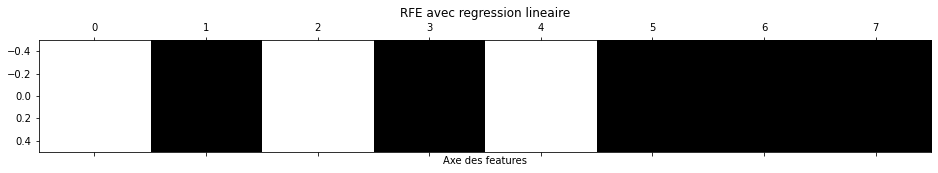

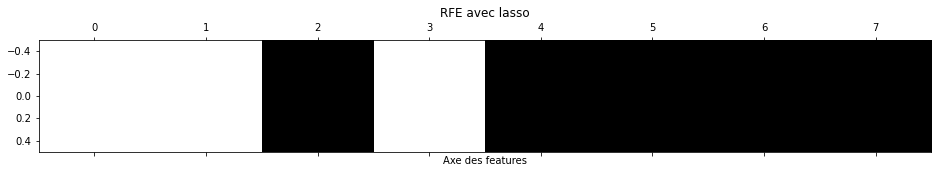

In [364]:
### On applique l'algorithme RFE auquel on fournit un modele de regression linéaire

lr = LinearRegression()
rfe_lr = RFE(estimator=lr, step=1, n_features_to_select = 5)
rfe_lr.fit(X_train, y_train)

mask = rfe_lr.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.title('RFE avec regression lineaire')
plt.xlabel('Axe des features');

### On applique l'algorithme RFE auquel on fournit un modele de Lasso

lasso = Lasso()
rfe_lasso = RFE(estimator=lasso, step=1, n_features_to_select = 5)
rfe_lasso.fit(X_train, y_train)

mask = rfe_lasso.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.title('RFE avec lasso')
plt.xlabel('Axe des features');

In [14]:
data

,LogGDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,PosAffect,NegAffect
0,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...
1944,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


La selection par regression linéaire garde les variables ayant une relation linéaire avec Life Ladder, soit : LogGDP, SocialSupport, Freedom, PosAffect, NegAffect

Tandis que par le modèle Lasso, les variables conservées sont : LifeExpectancy, Generosity, Corruption, PosAffect et NegAffect

Une telle différence s'explique sûrement par des dépendances entre variables mais aussi une différence de modèle=> le choix par Lasso montre que l'influence des variables matérialistes ne sont pas si importantes que cela

---
### Réduction de dimenssion par PCA
---

#### Mise en place DataFrame pour la PCA

In [365]:
### Isolement de Life Ladder
life_ladder=whr_NoNA['Life Ladder']

### DataFrame utilisé pour ACP
data_acp=whr_NoNA.drop(['Life Ladder','Region'],axis=1).set_index('Country')


#### Détermination nombre d'axes de représentation

Les ratio sont : [0.39348026 0.16671086 0.13968818 0.08366677 0.08247279 0.05416128
 0.03527536 0.03118381 0.0133607 ]


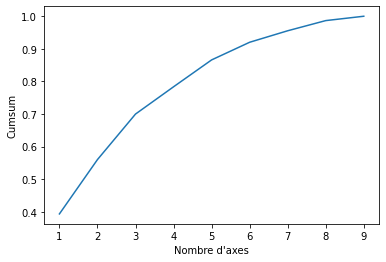

In [366]:
### Normalisation des données 
scaler = StandardScaler()  
Z = scaler.fit_transform(data_acp)

### Création de l'instance PCA
pca = PCA()

### Calcul des coordonnées de l'ACP
Coord = pca.fit_transform(Z)  

print('Les ratio sont :',pca.explained_variance_ratio_)

plt.plot(np.arange(1, 10), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nombre d'axes")
plt.ylabel('Cumsum');

La représentation sur 2 axes va représenter environ 55% de la variance expliquée

#### Représentation des dépendances sur les 2 premiers axes

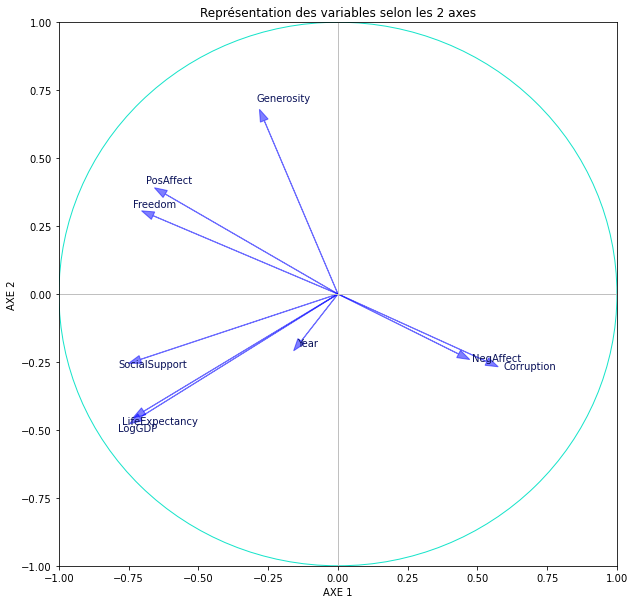

In [367]:
# corvar
sqrt_eigval = np.sqrt(pca.explained_variance_)
corvar = np.zeros((9, 9))
for k in range(9):
    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k]

fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# affichage des étiquettes (noms des variables) et des flèches
for j in range(9):
    plt.annotate(data_acp.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.9, corvar[j, 1]*0.9, alpha=0.5, head_width=0.03, color='b')

# ajouter les axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.title('Représentation des variables selon les 2 axes')
plt.show();

On remarque une dépendance entre LogGDP et LifeExpectancy , de même pour Corruption et NegAffect => on peut donc se poser la question d'en garder une sur les 2 à chaque fois.
La même question se pose pour Freedom et PosAffect

#### Représentation des pays sur les axes selon leur niveau de Life Ladder

In [368]:
#q = [0, 0.25, 0.5,0.75, 1]

life_ladder_cut = pd.qcut(life_ladder, q=4)

life_ladder_cut.value_counts()

(2.374, 4.595]    429
(6.259, 7.971]    427
(4.595, 5.364]    426
(5.364, 6.259]    426
Name: Life Ladder, dtype: int64

No handles with labels found to put in legend.


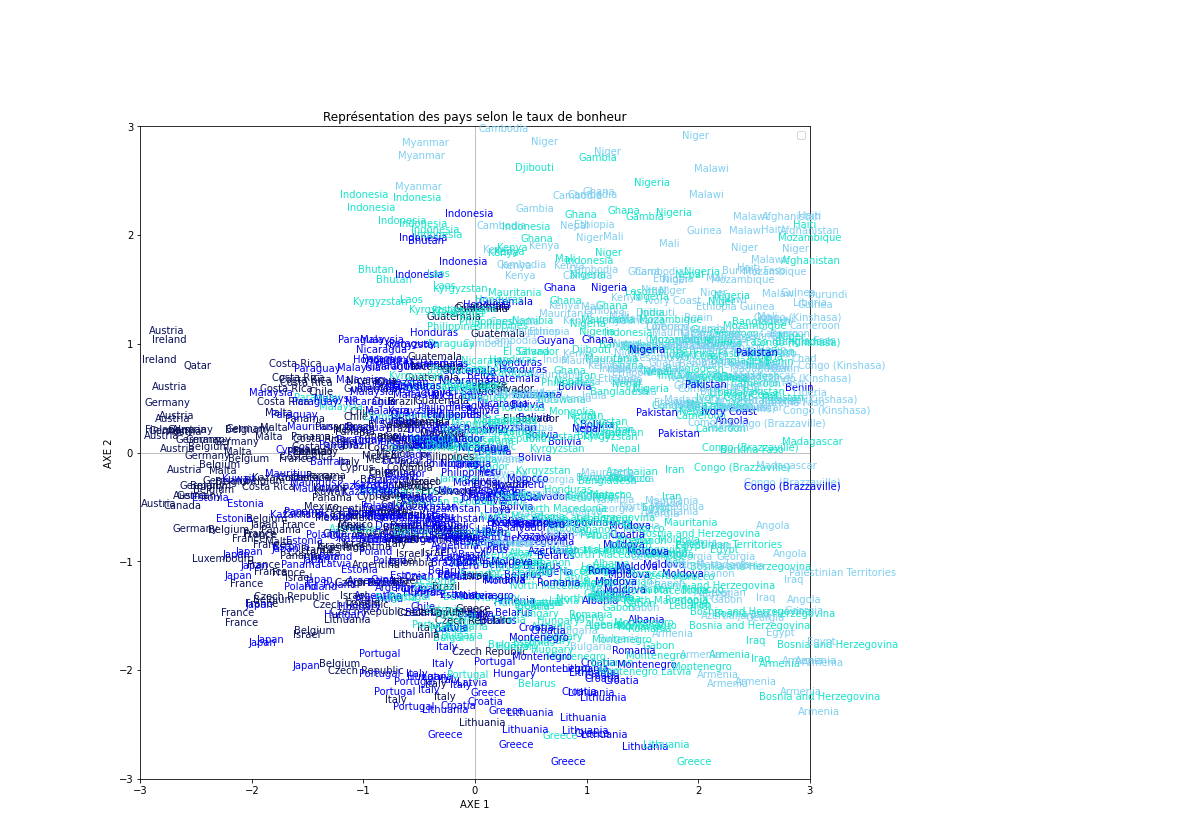

In [370]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12, 12))
axes.set_xlim(-3, 3) #même limites en abscisse
axes.set_ylim(-3, 3) #et en ordonnée
#placement des étiquettes des observations
for i in range(1280):
    if life_ladder.iloc[i] in life_ladder_cut.cat.categories[0]:
        plt.annotate(data_acp.index[i], (Coord[i, 0],Coord[i, 1]), color='#7FCFF1',label='tres faible')
    elif life_ladder.iloc[i] in life_ladder_cut.cat.categories[1]:
        plt.annotate(data_acp.index[i], (Coord[i, 0],Coord[i, 1]), color='#16E4CA',label='faible')
    elif life_ladder.iloc[i] in life_ladder_cut.cat.categories[2]:
        plt.annotate(data_acp.index[i], (Coord[i, 0],Coord[i, 1]), color='b',label='bon')
    else:
        plt.annotate(data_acp.index[i], (Coord[i, 0],Coord[i, 1]), color='#091158',label='tres bon')
            
#ajouter les axes
plt.plot([-6, 6], [0,0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-6, 6], color='silver', linestyle='-', linewidth=1)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.title('Représentation des pays selon le taux de bonheur')
plt.legend()
#affichage
plt.show();

On observe une claire coupure en 2 des pays selon leur Life Ladder, ceux ayant les meilleurs taux Life Ladder sont plus facilement décelables que les autres

In [355]:
import prince

pca = prince.PCA(n_components=2)
pca = pca.fit(Z)

correlation=pca.column_correlations(Z)
for i in range(0,9):
    correlation=correlation.rename(index={i:data_acp.columns[i]})

correlation

,0,1
Year,-0.146192,-0.192382
LogGDP,-0.787822,-0.503934
SocialSupport,-0.786265,-0.267421
LifeExpectancy,-0.773314,-0.479419
Freedom,-0.736159,0.320084
Generosity,-0.293436,0.708649
Corruption,0.592794,-0.276256
PosAffect,-0.687714,0.408688
NegAffect,0.480281,-0.245151


Il n'y pas de valeurs positives sur les 2 axes => on peut donc en déduire que les pays positionnés sur le cadran haut-droit ont des Life Ladder ne s'expliquant pas uniquement avec les variables présentes actuellement.

---
### Application Arbre de décision
---

#### Définition DataFrame sur lequel on se basera pour appliquer le modèle

In [338]:
### DataFrame pour l'arbre de décision (dtc)
whr_NoNA_dtc=whr_NoNA.drop(['Year','Region'],axis=1)
whr_NoNA_dtc=whr_NoNA_dtc.set_index('Country')

### Séparation de Life Ladder (variable cible)
life_ladder=whr_NoNA_dtc['Life Ladder']

### Suppression de Life Ladder de whr_NoNA_dtc
whr_NoNA_dtc=whr_NoNA_dtc.drop('Life Ladder',axis=1)

#### Découpage Life Ladder en catégories pour pouvoir appliquer l'algorithme

In [339]:
### Life Ladder sur 2 catégories avec la médiane comme valeure séparative
life_ladder_cut = pd.qcut(life_ladder, q=2,labels=[1,2])

### Life Ladder sur 10 catégories. Life Ladder est entre 0 et 10, il s'agit donc d'arrondir les valeurs => on a une marge d'erreur de 0.5
life_ladder_cut_dix = pd.cut(life_ladder, [0,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10],
                             labels=[0,1,2,3,4,5,6,7,8,9,10])

#### Séparation du jeu de données en jeu d'entraînement et test et entrainement du modèle

In [340]:
from sklearn.tree import DecisionTreeClassifier


### Modèle pour Life Ladder en 2 classes

# Jeux d'entraînement et test
X_train,X_test,y_train,y_test=train_test_split(whr_NoNA_dtc, life_ladder_cut, test_size=0.2,random_state=123)

# Définition du modèle
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=123)

#Entraînement du modèle
dt_clf.fit(X_train,y_train)


### Modèle pour Life Ladder en 10 classes

# Jeux d'entraînement et test
X_train_dix,X_test_dix,y_train_dix,y_test_dix=train_test_split(whr_NoNA_dtc, life_ladder_cut_dix, test_size=0.2,
                                                               random_state=123)
# Définition du modèle
dt_clf_dix=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=123)

#Entraînement du modèle
dt_clf_dix.fit(X_train_dix,y_train_dix)



DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

#### Mise en lumière des variables ayant le plus d'importance pour ce modèle selon le découpage de Life Ladder

In [342]:
### Tableau de classement d'importance pour Life Ladder en 2 classes

feats={}
for i,j in zip(whr_NoNA_dtc.columns,dt_clf.feature_importances_):
    feats[i]=j

importance=pd.DataFrame.from_dict(feats,orient='index')
importance=importance.rename(columns={0: 'Importance'})

importance.sort_values(by='Importance',ascending=False).head(8)



,Importance
LogGDP,0.585780
LifeExpectancy,0.178764
Freedom,0.087893
PosAffect,0.087444
SocialSupport,0.028901
Corruption,0.016604
NegAffect,0.008787
Generosity,0.005826


In [343]:
### Tableau de classement d'importance pour Life Ladder en 10 classes

feats_dix={}
for i,j in zip(whr_NoNA_dtc.columns,dt_clf_dix.feature_importances_):
    feats_dix[i]=j

importance_dix=pd.DataFrame.from_dict(feats_dix,orient='index')
importance_dix=importance_dix.rename(columns={0: 'Importance_dix'})

importance_dix.sort_values(by='Importance_dix',ascending=False).head(8)

,Importance_dix
LifeExpectancy,0.602808
LogGDP,0.146660
SocialSupport,0.132426
PosAffect,0.066296
Corruption,0.032710
Freedom,0.011420
Generosity,0.007679
NegAffect,0.000000


Lorsque c'est coupé en 2 on a l'ordre d'importance suivant : LogGDP(58.6%), LifeExpectancy(17.9%), Freedom(8.8%), PosAffect(8.7%), SocialSupport(2.9%)

Or lorsque Life Ladder coupé en dix on a l'ordre d'importance suivant : LifeExpenctancy (60%) puis LogGDP(14%), SocialSupport(13%), PosAffect(6.6%), Corruption (3%)

Ceci confirme le fait que le PIB (logGDP) n'explique pas tout. Plus on veut être précis dans la détermination du Life Ladder moins le PIB a d'effet.
En outre plus l'on veut être précis on a des valeurs négatives comme la corruption qui ont une influence qui augmente.


#### Performance du modèle

In [345]:
### Regardons le score du modèle : soit le taux de bonnes prédictions

# Score lorsque Life Ladder en 2 catégories
print(dt_clf.score(X_test, y_test))

# Score lorsque Life Ladder en 10 catégories
print(dt_clf_dix.score(X_test_dix, y_test_dix))

0.9035087719298246
0.6111111111111112


Sans surprise, plus l'on veut être précis moins le modèle est performant.

Le score 90% pour un Life Ladder coupé en 2 montre confirme clairement une coupure en 2 au niveau mondial et que le niveau de PIB explique largement la différence entre ces 2 catégories de pays.

#### Regardons quels sont les types de pays les mieux prédits

In [347]:
### Affichons la table de corrélation pour Life Ladder en 2 catégories

y_pred=dt_clf.predict(X_test)

pd.crosstab(y_test,y_pred,rownames=['reel'],colnames=['predit'])



predit,1,2
reel,,
1,150,18
2,15,159


On observe clairement une très bonne prédiction pour ces catégories avec un léger avantage pour les pays ayant un Life Ladder supérieur à la médiane

In [348]:
### Affichons la table de corrélation pour Life Ladder en 10 catégories

y_pred_dix=dt_clf_dix.predict(X_test_dix)

pd.crosstab(y_test_dix,y_pred_dix,rownames=['reel'],colnames=['predit'])

predit,4,5,6,7
reel,,,,
3,10,4,0,0
4,33,25,2,0
5,15,66,26,0
6,0,13,78,9
7,0,2,19,32
8,0,0,0,8


On observe que les mieux prédits sont ceux ayant un Life Ladder entre 5 et 7, il s'agit bien de ceux autour ou au-dessus de la médiane.
Les extrêmes sont moins bien prédits. Pour les meilleurs c'est dû au fait qu'il n'y en a pas beaucoup. Par contre pour ceux étant en-dessous de la médiane, cela signifie que les variables présentes n'expliquent pas tout.
Même pour les variables présentes il peut y avoir un biais comme pour la corruption qui est très subjective puisque se basant sur un ressentiment lié au climat politique.

La spiritualité, la religion peut également avoir un impact, tout comme le climat politique ou la démographie.
Il serait intéressant également d'expliquer les cas comme l'Amérique latine qui a des variables matérielles non élevées mais qui par contre a un taux Life Ladder parmi les plus élevés. 
Il y a également des contrastes inter régions à mettre en exergue éventuellement comme ce peut être le cas en Europe Occidentale entre les pays du Nord et pays du Sud latins.